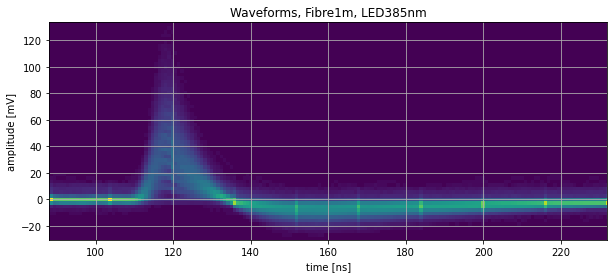

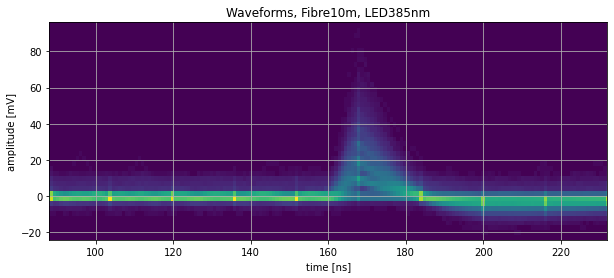

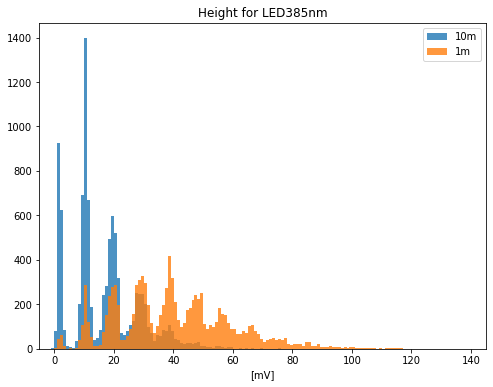

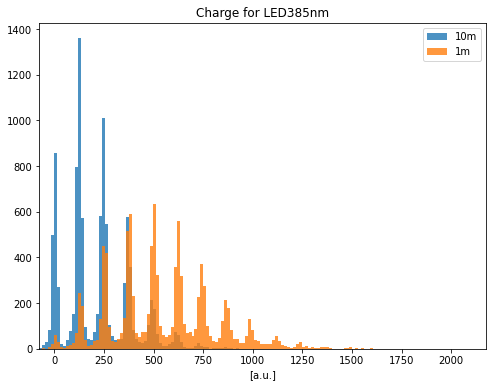

Loss= 0.39192320781412016  @ 385 nm


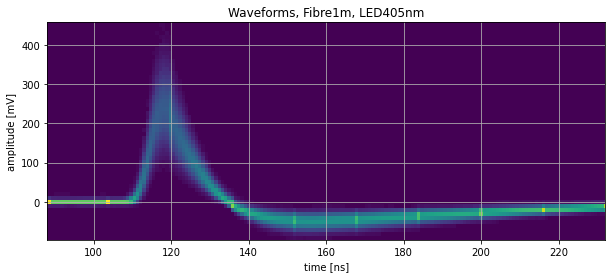

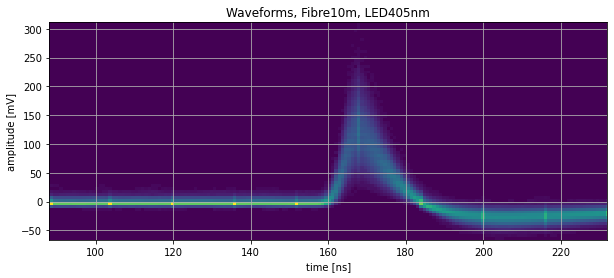

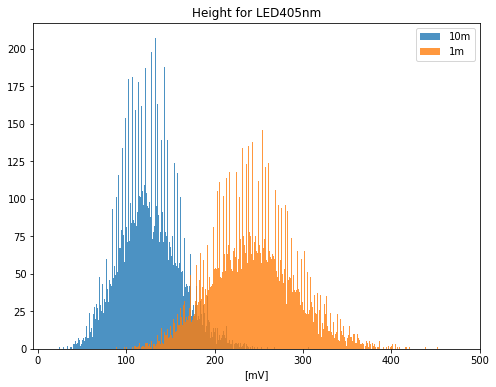

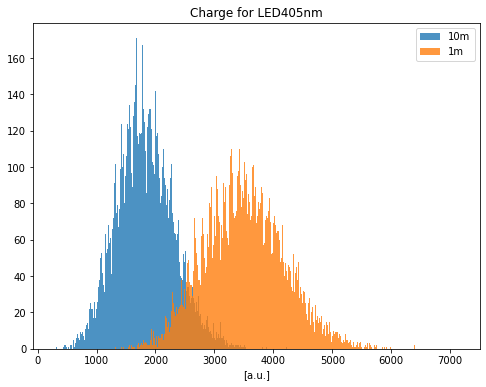

Loss= 0.5209734224079426  @ 405 nm


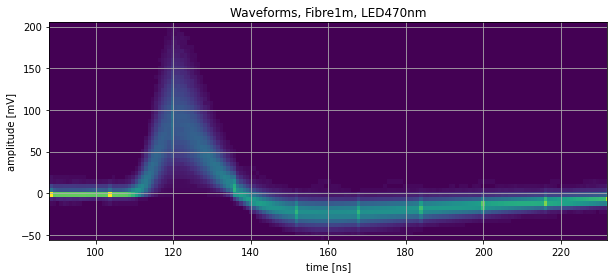

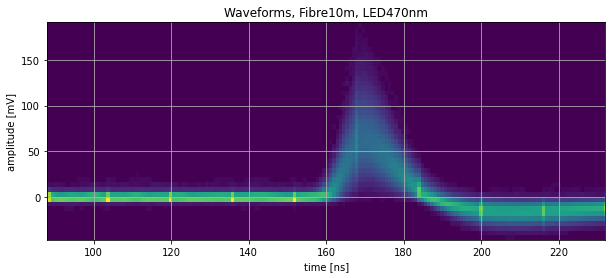

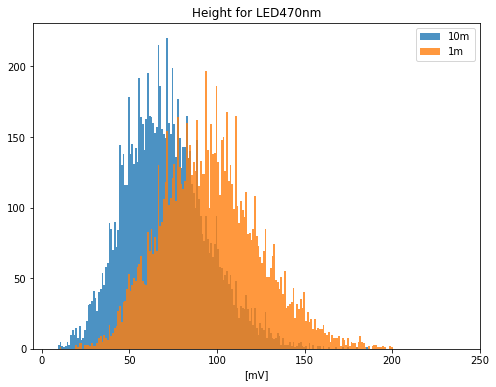

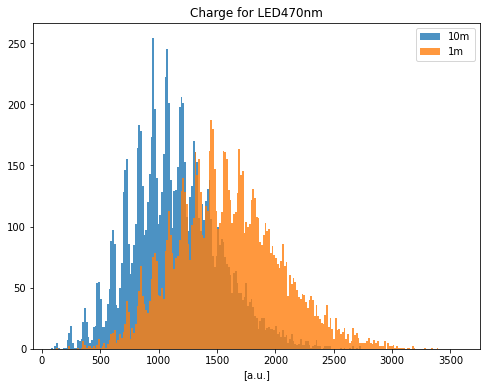

Loss= 0.7207189951275319  @ 470 nm


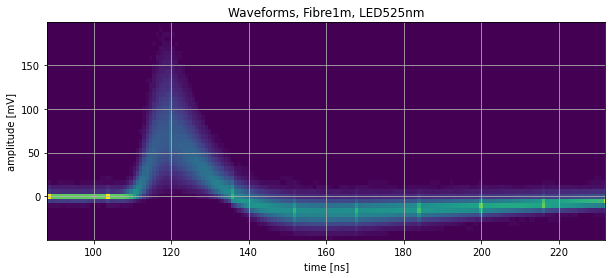

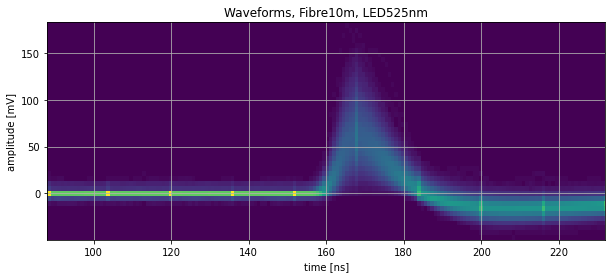

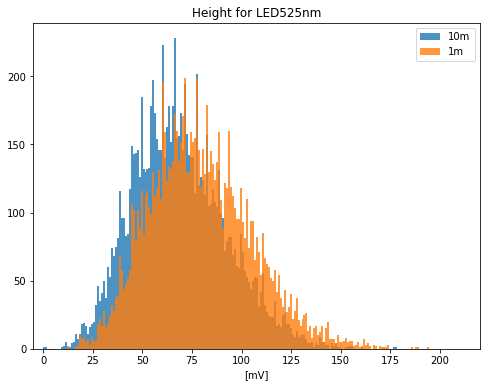

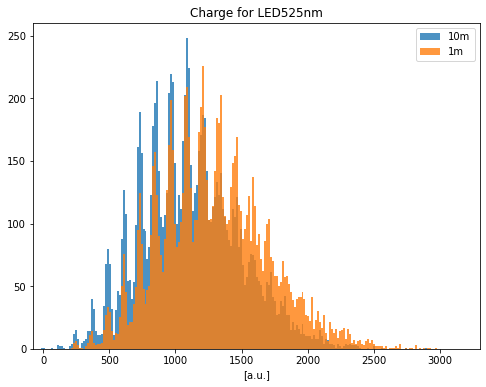

Loss= 0.8626955319728977  @ 525 nm


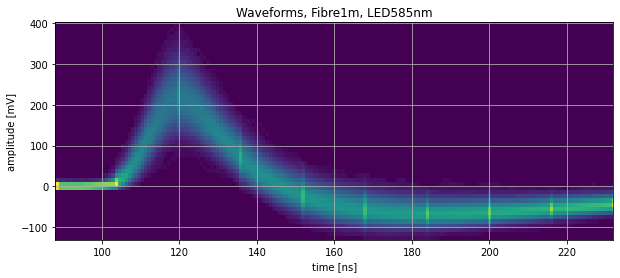

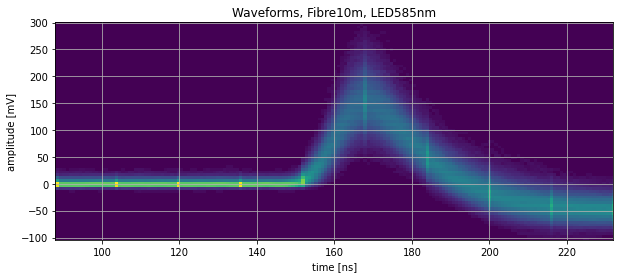

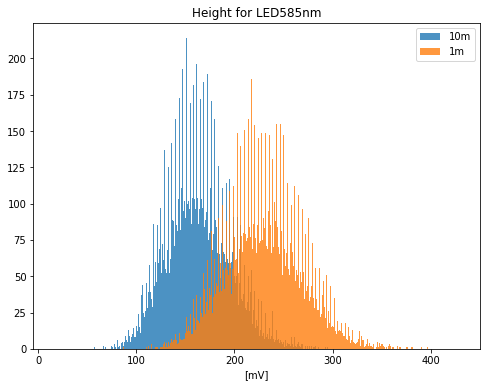

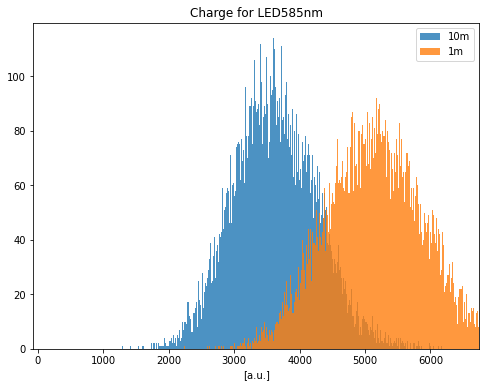

Loss= 0.7000487299439762  @ 585 nm


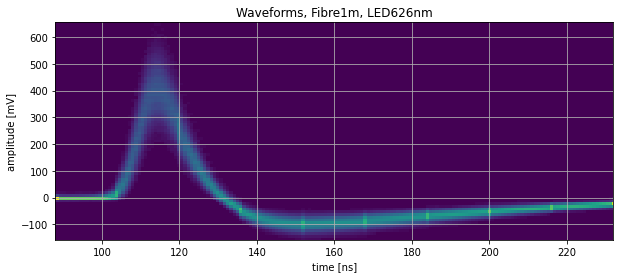

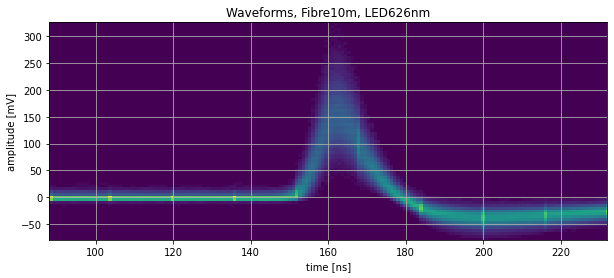

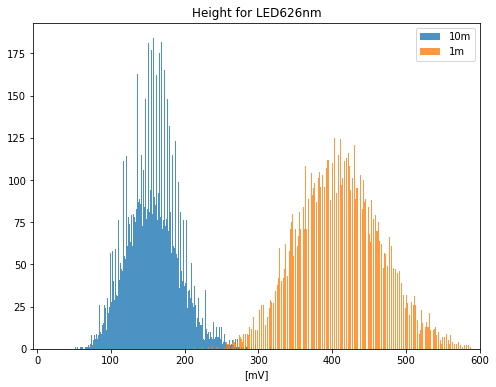

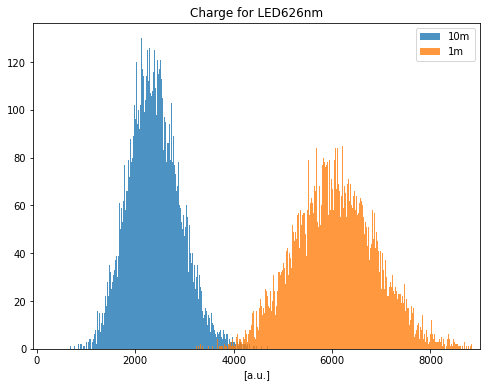

Loss= 0.39381706519627413  @ 626 nm


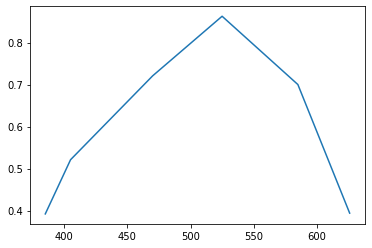

In [12]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import glob

def running_mean(x, N):                                                                                                                                                                  
  cumsum = np.cumsum(np.insert(x, 0, 0))
  return (cumsum[N:] - cumsum[:-N])/ float(N)#, np.sqrt(cumsum[N:] - cumsum[:-N])/ float(N)

dataDir="/Volumes/GoogleDrive/My Drive/MonashLabTest/PlasticFibreTests/"

#LED Wavelength Files
wlen = [385,405,470,525,585,626]
drawMax = [145,500,250,220,450,600]
Samples = 396
dt = 0.8e-9
freqThreshold = 0.25e8
nave = 5 # for moving average
#time = np.linspace(0.0,Samples*dt,Samples)
time = np.linspace(0.0,Samples*0.8,Samples)
fftT = np.linspace(0.0, 1.0/(2.0*dt), Samples//2)

subDirs=['Sep03_LEDTests/test_hv42_','Sep11Tests/Sep11_hv42_']
length=[1,10]
timeThre=[120,180]
width=32
sumRange=[[137,137+width],[196,196+width]]
factor=15 #
realLen=['1m','10m']

chargeLoss=np.array([])

for iw in range(len(wlen)):
    height=[[],[]]
    charge=[[],[]]
    
    for il in range(2):
        plt.figure(figsize=(10,4))
        if iw<4:
            fileList=dataDir+'Sep03_LEDTests/test_hv42_'+str(length[il])+'m_plastic_LED'+str(wlen[iw])+'*.npy'
        else:
            fileList=dataDir+'Sep11Tests/Sep11_hv42_'+str(length[il])+'m_plastic_LED'+str(wlen[iw])+'nm_test1_*.npy'
        
        #print(fileList)
        files = glob.glob(fileList)
        #print(files)
        plotx=np.array([])
        ploty=np.array([])
        if len(files)==0:
            print('No such file!')
            print(files[0])
            continue
        
        for ifile in range(len(files)):
            fileData = np.array(np.load(files[ifile],allow_pickle=True))
            wfs=fileData[6]
            
            for j in range(int(len(wfs)/2)):
                wf     = wfs[2*j,:]
                wfFilt = running_mean(wf, nave)
                plotx = np.append(plotx,time[100:300])
                ploty = np.append(ploty,wfFilt[100:300])
                    
                height[il].append(wfFilt[timeThre[il]:timeThre[il]+50].max())
                charge[il].append(wfFilt[sumRange[il][0]:sumRange[il][1]].sum())
        ranges=([105*0.8,295*0.8],[ploty.min()-5.0,ploty.max()+5.0])
        deltay=2.5
        if abs(ploty.max()-ploty.min())>200: deltay=5.0
        if abs(ploty.max()-ploty.min())>400: deltay=10.0
        biny=int((ploty.max()-ploty.min())/deltay)
        plt.hist2d(plotx,ploty,bins=[180,biny],range=ranges,norm=mcolors.PowerNorm(0.4))
        plt.title('Waveforms, Fibre'+realLen[il]+', LED'+str(wlen[iw])+'nm')
        plt.xlim(110*0.8,290*0.8)
        plt.xlabel('time [ns]')
        plt.ylabel('amplitude [mV]')
        plt.grid()
        plt.show()
    
    plt.figure(figsize=(8,6))
    plt.title('Height for LED'+str(wlen[iw])+'nm')
    plt.hist(height[1],bins=np.linspace(-10,590,600),alpha=0.8,label=realLen[1])
    plt.hist(height[0],bins=np.linspace(-10,590,600),alpha=0.8,label=realLen[0])
    plt.xlim(-5,drawMax[iw])
    plt.xlabel('[mV]')
    plt.legend(loc='upper right')
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.title('Charge for LED'+str(wlen[iw])+'nm')
    plt.hist(charge[1],bins=np.linspace(-10*factor,590*factor,600),alpha=0.8,label=realLen[1])
    plt.hist(charge[0],bins=np.linspace(-10*factor,590*factor,600),alpha=0.8,label=realLen[0])
    plt.xlim(-5*factor,drawMax[iw]*factor)
    plt.legend(loc='upper right')
    plt.xlabel('[a.u.]')
    plt.show()
    
    loss=np.array(charge[1]).mean()/np.array(charge[0]).mean()
    chargeLoss=np.append(chargeLoss,loss)
    print('Loss=',loss,' @',wlen[iw],'nm')

plt.plot(wlen,chargeLoss)

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

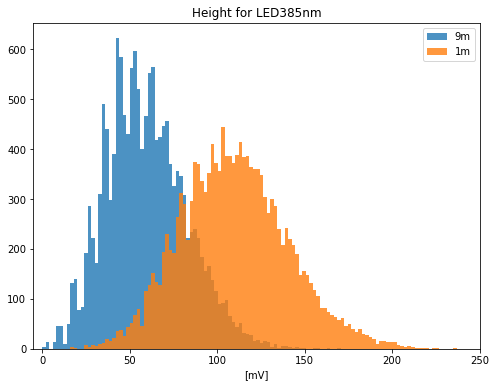

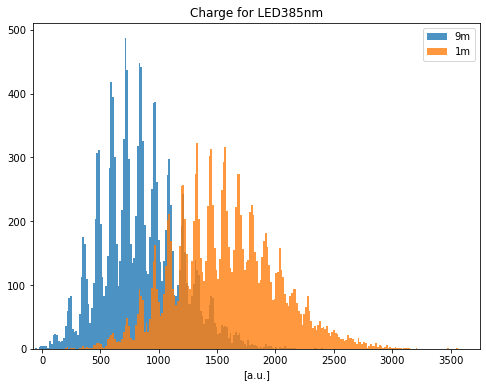

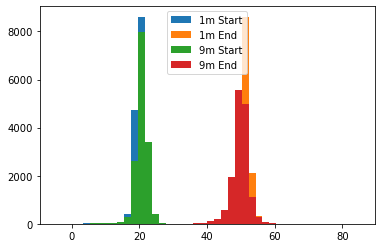

plastic
1567.9793429150984 846.1324744113268
Loss= 0.5396324117626736  @ 385 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

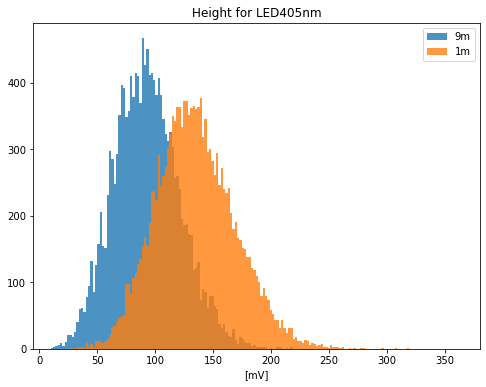

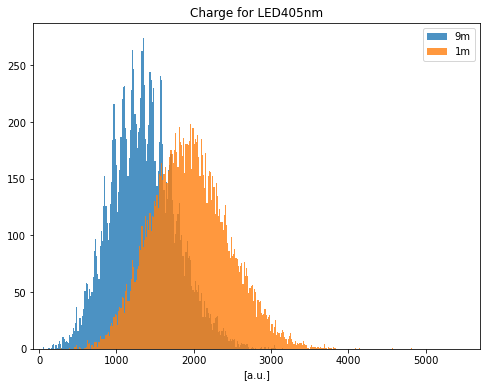

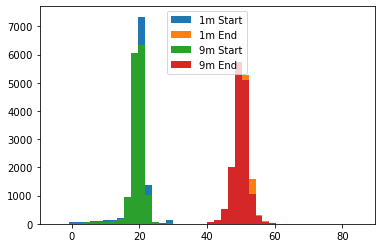

plastic
1955.1385505055687 1348.9604687710678
Loss= 0.689956457777505  @ 405 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

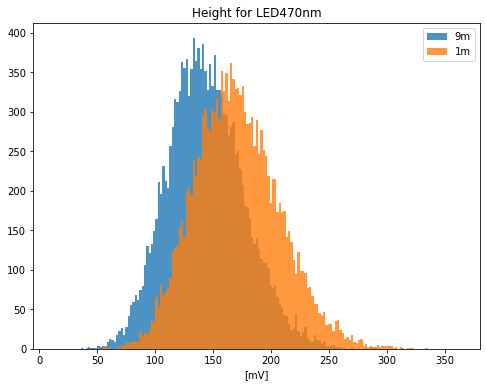

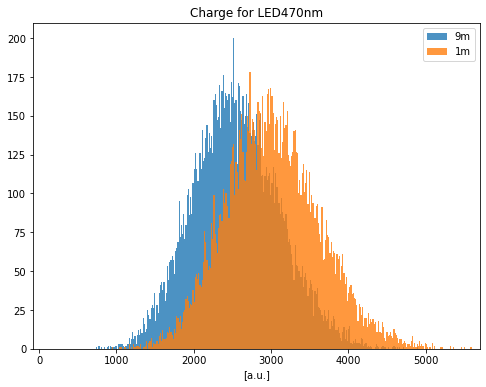

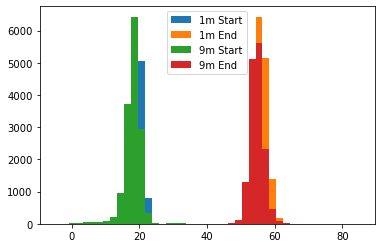

plastic
3019.0018080964755 2550.8357935951344
Loss= 0.8449268850234553  @ 470 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

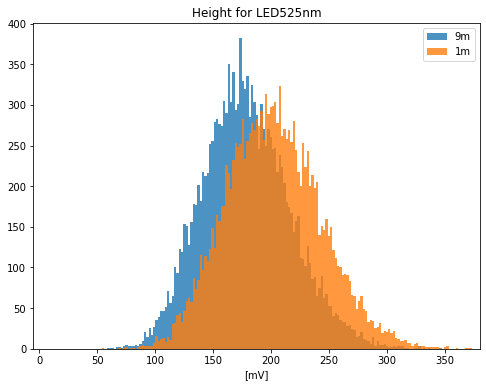

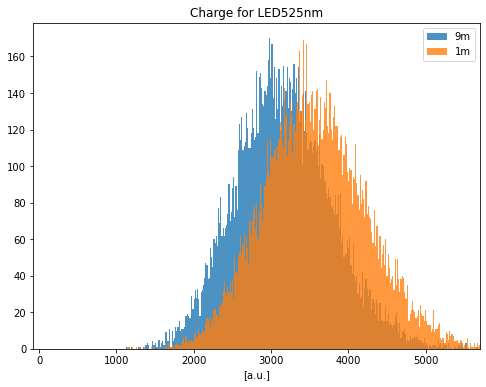

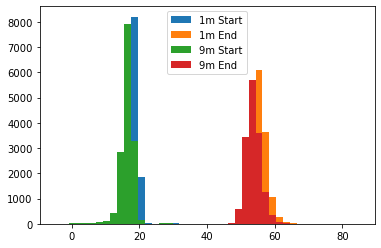

plastic
3569.929079087659 3162.7639240961103
Loss= 0.8859458700799723  @ 525 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

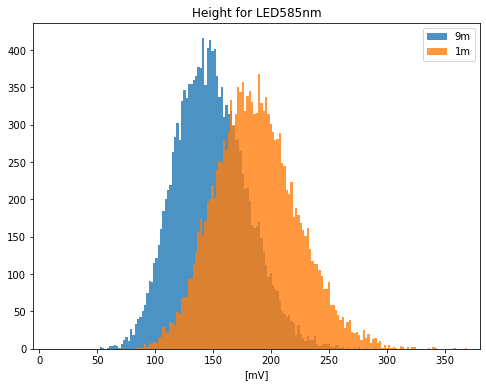

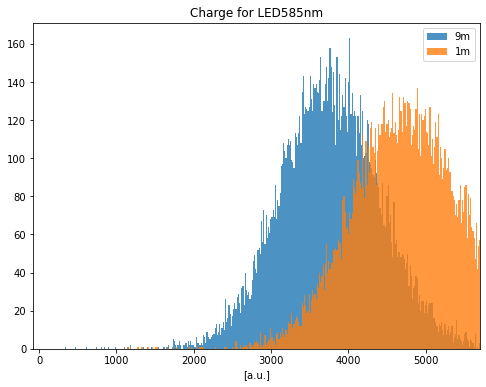

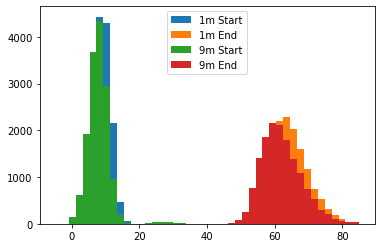

plastic
4788.040747750546 3767.8677096114675
Loss= 0.7869330918667802  @ 585 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

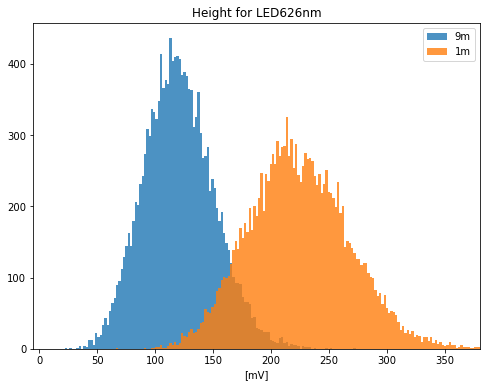

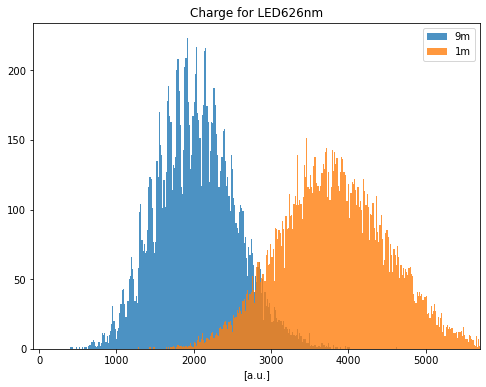

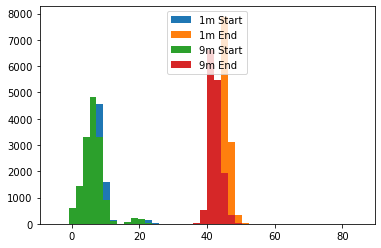

plastic
3823.5971611497203 2038.5744661116507
Loss= 0.5331561825667509  @ 626 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

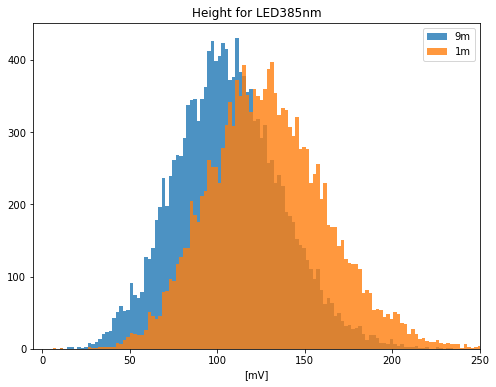

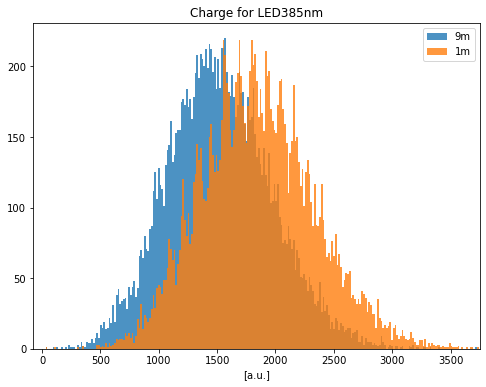

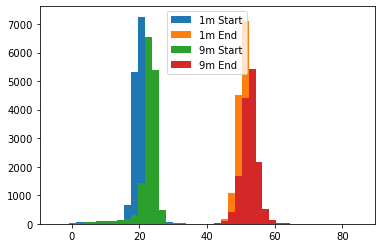

glass
1848.5632413793037 1522.8609662232054
Loss= 0.8238078807014058  @ 385 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

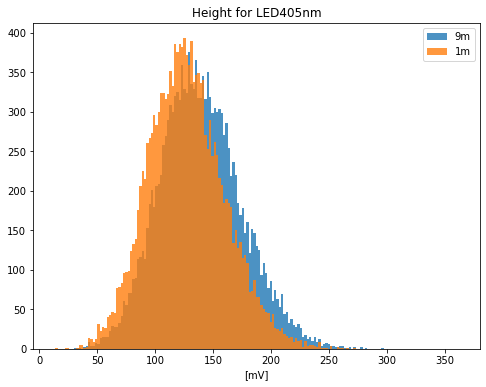

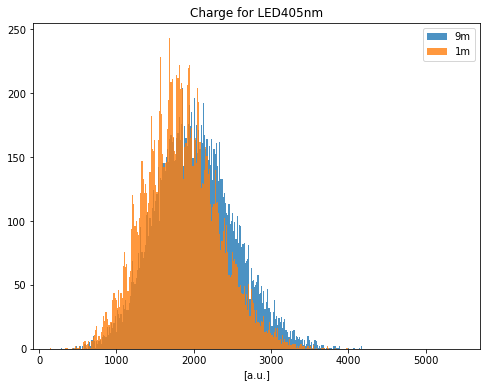

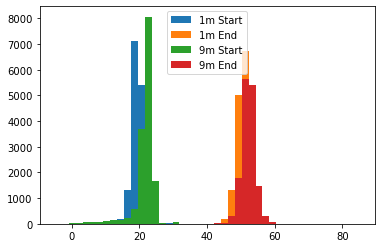

glass
1842.662312007651 2019.7264992961188
Loss= 1.0960915009411298  @ 405 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

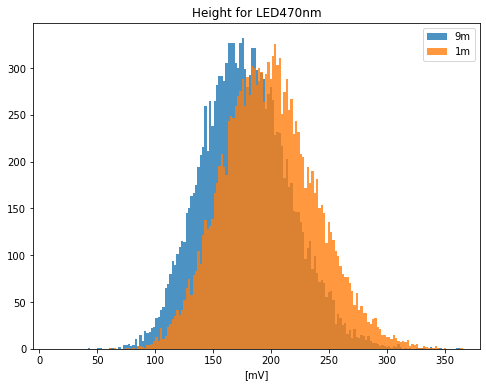

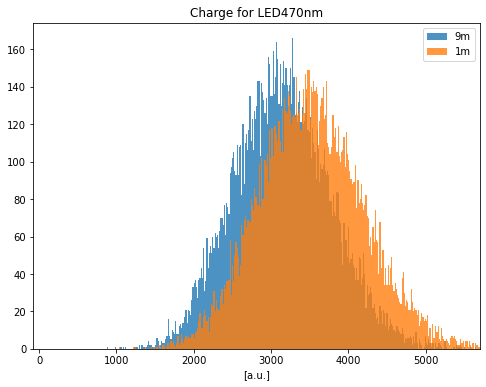

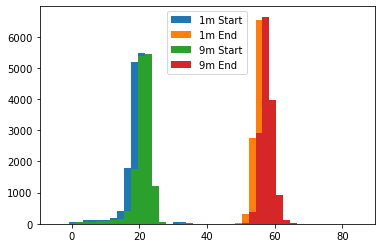

glass
3520.62921474003 3149.160615171638
Loss= 0.8944880085601908  @ 470 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

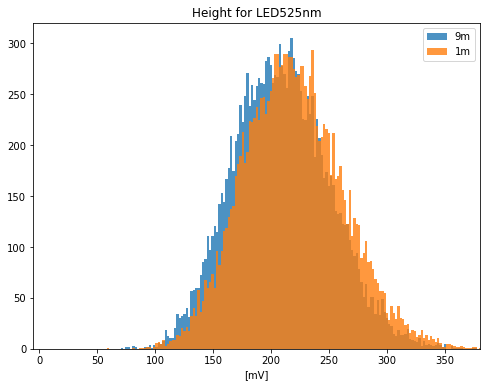

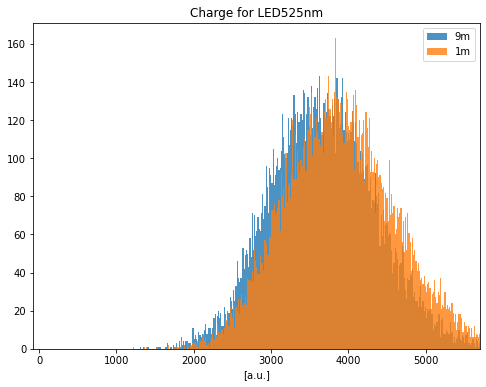

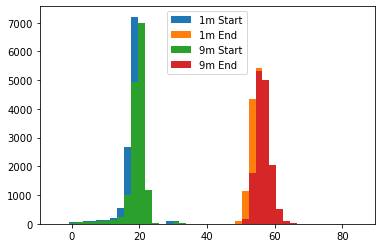

glass
3895.7882625353564 3683.0611414592668
Loss= 0.9453956152797565  @ 525 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

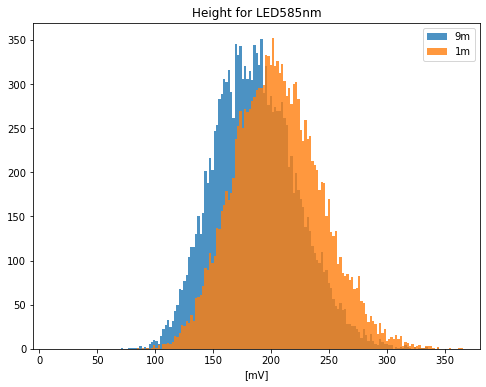

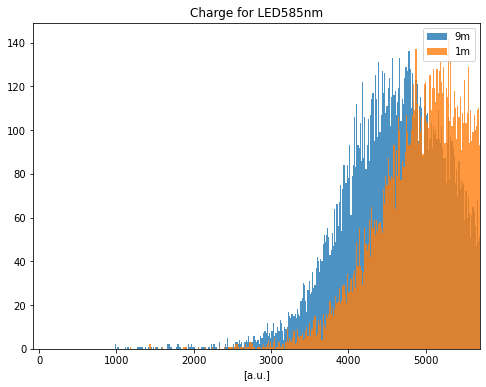

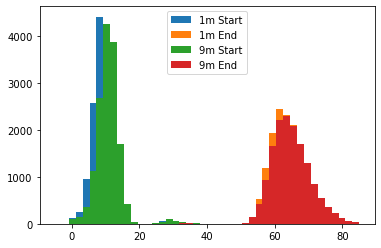

glass
5264.351065656332 4728.319374435223
Loss= 0.8981770621799746  @ 585 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

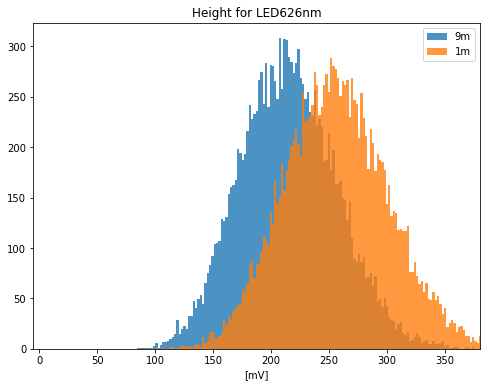

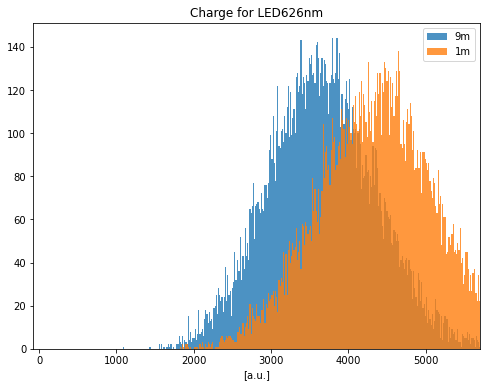

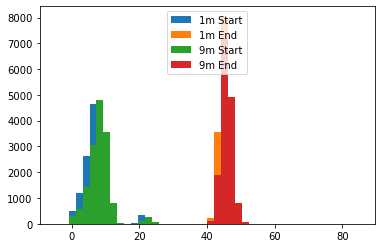

glass
4386.3239908655005 3662.0050339589316
Loss= 0.8348687971032327  @ 626 nm
[0.53963241 0.68995646 0.84492689 0.88594587 0.78693309 0.53315618
 0.82380788 1.0960915  0.89448801 0.94539562 0.89817706 0.8348688 ]


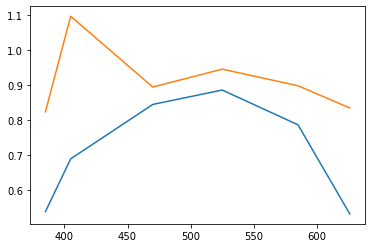

In [54]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import glob

def running_mean(x, N):                                                                                                                                                                  
  cumsum = np.cumsum(np.insert(x, 0, 0))
  return (cumsum[N:] - cumsum[:-N])/ float(N)#, np.sqrt(cumsum[N:] - cumsum[:-N])/ float(N)

dataDir="/Volumes/GoogleDrive/My Drive/MonashLabTest/PlasticFibreTests/"

#LED Wavelength Files
wlen = [385,405,470,525,585,626]
drawMax = [250,380,380,380,380,380]
dt = 0.8e-9
freqThreshold = 0.25e8
nave = 6 # for moving average
#time = np.linspace(0.0,Samples*dt,Samples)
time = np.linspace(0.0,Samples*0.8,Samples)
fftT = np.linspace(0.0, 1.0/(2.0*dt), Samples//2)

subDirs=['Sep21Tests/Sep21_hv42_']
length=[1,9]
pedestal=95
timeThre=[118,173]
sigWidth=85
sumWidth=28
sumRange=[[139,139+sumWidth],[196,196+sumWidth]]
factor=15 #
realLen=['1m','9m']
mat=['plastic','glass']

chargeLoss=np.array([])
aho=np.linspace(135,235,100)

for im in range(len(mat)):
    for iw in range(len(wlen)):
        height=[[],[]]
        charge=[[],[]]
        timing=[[],[],[],[]]

        for il in range(2):
            plt.figure(figsize=(10,4))
            if iw<2:
                fileList=dataDir+'Sep21Tests/Sep21_hv42_'+str(length[il])+'m_'+mat[im]+'_LED'+str(wlen[iw])+'*.npy'
            else:
                fileList=dataDir+'Sep22Tests/Sep22_hv42_'+str(length[il])+'m_'+mat[im]+'_LED'+str(wlen[iw])+'*.npy'

            #print(fileList)
            files = glob.glob(fileList)
            #print(files)
            plotx=np.array([])
            ploty=np.array([])
            if len(files)==0:
                print('No such file!')
                print(fileList)
                continue

            for ifile in range(len(files)):
                fileData = np.array(np.load(files[ifile],allow_pickle=True))
                wfs=fileData[6]

                for j in range(int(len(wfs)/2)):
                    wf     = wfs[2*j,:]
                    wfFilt = running_mean(wf, nave)
                    #plotx = np.append(plotx,time[100:300])
                    #ploty = np.append(ploty,wfFilt[100:300])
                    baseMu = wfFilt[nave:pedestal].mean()
                    baseStd= wfFilt[nave:pedestal].std()

                    #### Refined height calculation based on the baseline analysis
                    wfFilt2 = wfFilt-baseMu
                    baseline=np.array([])
                    for ip in range(nave,pedestal+1,1):
                        if abs(wfFilt2[ip])>3*baseStd: continue
                        baseline = np.append(baseline,wfFilt2[ip])
                    
                    baseMu = baseline.mean()
                    waveform=np.array(wfFilt2[timeThre[il]:timeThre[il]+sigWidth])-baseMu
                    
                    if waveform.max()>=3*baseStd:
                        maxBinIndex=np.argmax(waveform)
                        integRange=[maxBinIndex-1,maxBinIndex+1]
                        for k in range(maxBinIndex,0,-1):
                            if waveform[k]<3*baseStd:
                                integRange[0]=k
                                break
                        for k in range(maxBinIndex,sigWidth,1):
                            if waveform[k]<3*baseStd:
                                integRange[1]=k
                                break
                        if integRange[0]>0:
                            integRange[0]=integRange[0]-1
                        if integRange[1]<sigWidth-1:
                            integRange[1]=integRange[1]+1
                    if waveform.max()<3*baseStd:
                        integRange[0]=15
                        integRange[1]=45
                    height[il].append(waveform.max())
                    charge[il].append(waveform[integRange[0]:integRange[1]].sum())
                    
                    timing[2*il].append(integRange[0])
                    timing[2*il+1].append(integRange[1])
                    
                    #plotx = np.append(plotx,aho)
                    #ploty = np.append(ploty,wfFilt2[135:235])
                    #print(len(plotx),len(ploty))
            
#             ranges=([135,235],[ploty.min()-5.0,ploty.max()+5.0])
#             deltay=2.5
#             #print(len(plotx),len(ploty))
#             if abs(ploty.max()-ploty.min())>200: deltay=4.0
#             if abs(ploty.max()-ploty.min())>400: deltay=8.0
#             biny=int((ploty.max()-ploty.min()+10.0)/deltay)
#             plt.hist2d(plotx,ploty,bins=[100,biny],range=ranges,norm=mcolors.PowerNorm(0.4))
#             plt.title('Waveforms, Fibre'+realLen[il]+', LED'+str(wlen[iw])+'nm')
#             plt.xlim(135,235)
#             plt.xlabel('time [tick]')
#             plt.ylabel('amplitude [mV]')
#             plt.grid()
#             plt.show()

        plt.figure(figsize=(8,6))
        plt.title('Height for LED'+str(wlen[iw])+'nm')
        plt.hist(height[1],bins=np.linspace(-10,590,300),alpha=0.8,label=realLen[1])
        plt.hist(height[0],bins=np.linspace(-10,590,300),alpha=0.8,label=realLen[0])
        plt.xlim(-5,drawMax[iw])
        plt.xlabel('[mV]')
        plt.legend(loc='upper right')
        plt.show()

        plt.figure(figsize=(8,6))
        plt.title('Charge for LED'+str(wlen[iw])+'nm')
        plt.hist(charge[1],bins=np.linspace(-10*factor,590*factor,600),alpha=0.8,label=realLen[1])
        plt.hist(charge[0],bins=np.linspace(-10*factor,590*factor,600),alpha=0.8,label=realLen[0])
        plt.xlim(-5*factor,drawMax[iw]*factor)
        plt.legend(loc='upper right')
        plt.xlabel('[a.u.]')
        plt.show()
        
        plt.hist(timing[0],bins=np.linspace(-5,85,45),label='1m Start')
        plt.hist(timing[1],bins=np.linspace(-5,85,45),label='1m End')
        plt.hist(timing[2],bins=np.linspace(-5,85,45),label='9m Start')
        plt.hist(timing[3],bins=np.linspace(-5,85,45),label='9m End')
        plt.legend(loc='upper center')
        plt.show()

        print(mat[im])
        print(np.array(charge[0]).mean(),np.array(charge[1]).mean())
        loss=np.array(charge[1]).mean()/np.array(charge[0]).mean()
        chargeLoss=np.append(chargeLoss,loss)
        print('Loss=',loss,' @',wlen[iw],'nm')

print(chargeLoss)

plt.plot(wlen,chargeLoss[:int(len(wlen))])
plt.plot(wlen,chargeLoss[int(len(wlen)):])

**Try to see the dark noise...**

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

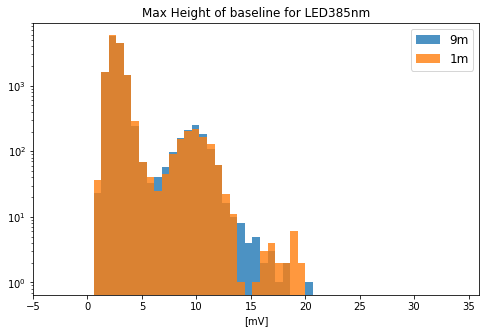

1m ,\mu_{baseline}= 0.3934733158355206 ,\sigma_{baseline}= 1.3233486232347733
9m ,\mu_{baseline}= 0.5144634004082824 ,\sigma_{baseline}= 1.3326397660218046
####   plastic  @ 385 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

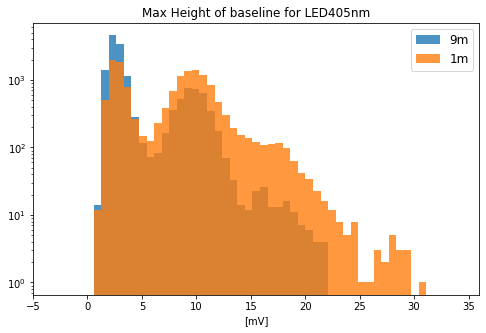

1m ,\mu_{baseline}= -0.6007353941868386 ,\sigma_{baseline}= 2.6946585589950383
9m ,\mu_{baseline}= 2.2855263925342686 ,\sigma_{baseline}= 1.7312426338840434
####   plastic  @ 405 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

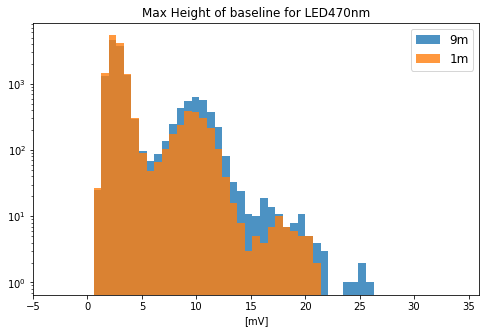

1m ,\mu_{baseline}= -0.2193598716827064 ,\sigma_{baseline}= 1.4464272757455139
9m ,\mu_{baseline}= -0.54640662972684 ,\sigma_{baseline}= 1.6491751640809522
####   plastic  @ 470 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

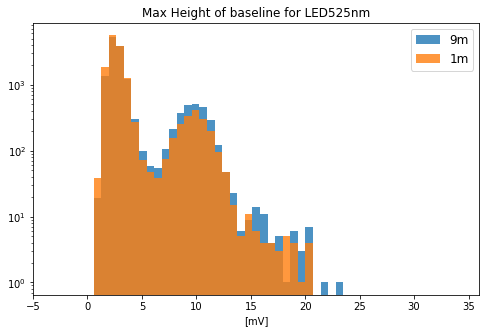

1m ,\mu_{baseline}= 2.7646106736657945 ,\sigma_{baseline}= 1.4296865312837086
9m ,\mu_{baseline}= 1.530747545445709 ,\sigma_{baseline}= 1.5478541895064624
####   plastic  @ 525 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

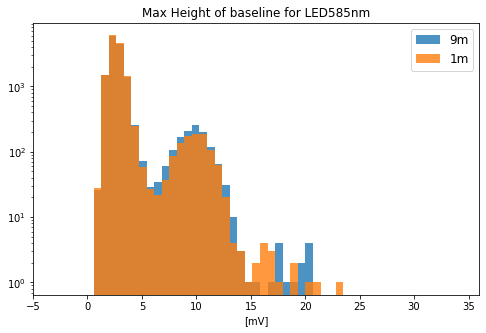

1m ,\mu_{baseline}= 0.8560649363274037 ,\sigma_{baseline}= 1.3143644669087242
9m ,\mu_{baseline}= 0.673684261689511 ,\sigma_{baseline}= 1.339908171932568
####   plastic  @ 585 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

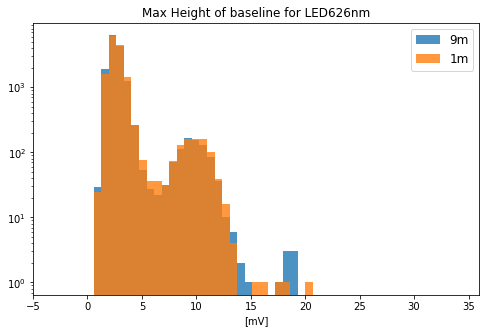

1m ,\mu_{baseline}= 1.2580820452998935 ,\sigma_{baseline}= 1.298306727407433
9m ,\mu_{baseline}= 2.1599144551375544 ,\sigma_{baseline}= 1.2764016653509311
####   plastic  @ 626 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

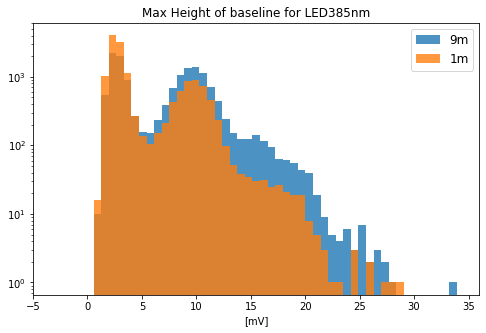

1m ,\mu_{baseline}= 1.043888888888889 ,\sigma_{baseline}= 1.8883468587139152
9m ,\mu_{baseline}= -0.6261849907650441 ,\sigma_{baseline}= 2.540965938701594
####   glass  @ 385 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

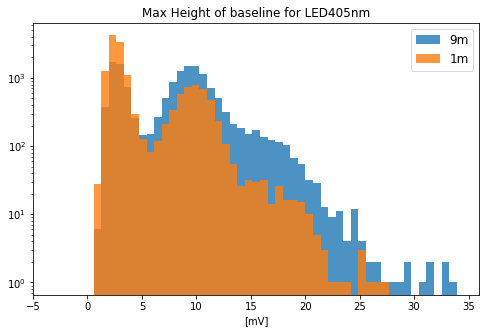

1m ,\mu_{baseline}= -0.7521463983668712 ,\sigma_{baseline}= 1.8000289645465675
9m ,\mu_{baseline}= -0.011837270341207887 ,\sigma_{baseline}= 2.8388339522400963
####   glass  @ 405 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

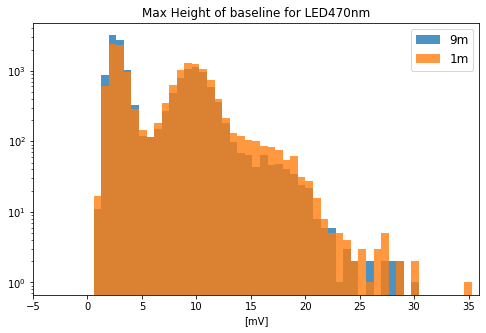

1m ,\mu_{baseline}= -0.25206182560513324 ,\sigma_{baseline}= 2.4462478671671417
9m ,\mu_{baseline}= -0.5348104403616221 ,\sigma_{baseline}= 2.1446209037739337
####   glass  @ 470 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

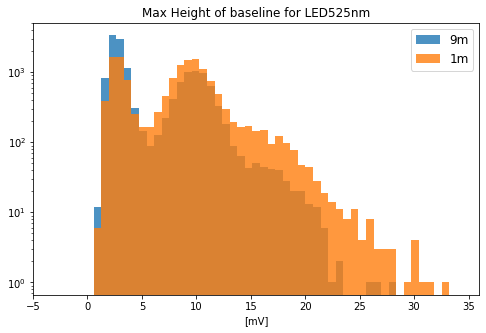

1m ,\mu_{baseline}= -0.07716972878390255 ,\sigma_{baseline}= 2.8193082849730184
9m ,\mu_{baseline}= 0.8347506561679789 ,\sigma_{baseline}= 2.085869430952462
####   glass  @ 525 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

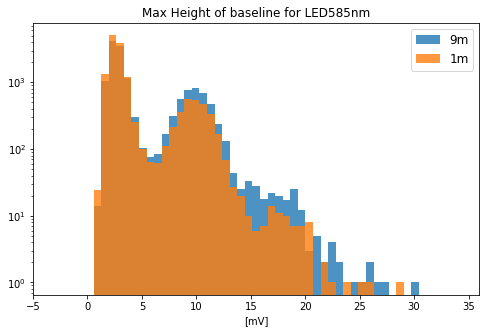

1m ,\mu_{baseline}= 1.1137105084086716 ,\sigma_{baseline}= 1.590796677703731
9m ,\mu_{baseline}= 0.8409414795372802 ,\sigma_{baseline}= 1.8219594908187011
####   glass  @ 585 nm


<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

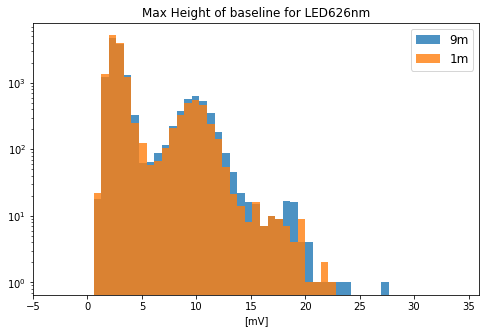

1m ,\mu_{baseline}= 1.2815373772722858 ,\sigma_{baseline}= 1.5546889692849262
9m ,\mu_{baseline}= 0.3596626810537571 ,\sigma_{baseline}= 1.63415768916905
####   glass  @ 626 nm


In [15]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import glob

def running_mean(x, N):                                                                                                                                                                  
  cumsum = np.cumsum(np.insert(x, 0, 0))
  return (cumsum[N:] - cumsum[:-N])/ float(N)#, np.sqrt(cumsum[N:] - cumsum[:-N])/ float(N)

dataDir="/Volumes/GoogleDrive/My Drive/MonashLabTest/PlasticFibreTests/"

#LED Wavelength Files
wlen = [385,405,470,525,585,626]
Samples = 396
dt = 0.8e-9
freqThreshold = 0.25e8
nave = 6 # for moving average
#time = np.linspace(0.0,Samples*dt,Samples)
time = np.linspace(0.0,Samples*0.8,Samples)
fftT = np.linspace(0.0, 1.0/(2.0*dt), Samples//2)

subDirs=['Sep21Tests/Sep21_hv42_']
length=[1,9]
timeThre=95
width=32
sumRange=[[137,137+width],[196,196+width]]
factor=15 #
realLen=['1m','9m']
mat=['plastic','glass']

chargeLoss=np.array([])

for im in range(len(mat)):
    for iw in range(len(wlen)):
        height=[[],[]]
        charge=[[],[]]
        height2=[[],[]]
        charge2=[[],[]]
        
        base=[[],[]]
        stdd=[[],[]]
        
        for il in range(2):
            plt.figure(figsize=(10,4))
            if iw<2:
                fileList=dataDir+'Sep21Tests/Sep21_hv42_'+str(length[il])+'m_'+mat[im]+'_LED'+str(wlen[iw])+'*.npy'
            else:
                fileList=dataDir+'Sep22Tests/Sep22_hv42_'+str(length[il])+'m_'+mat[im]+'_LED'+str(wlen[iw])+'*.npy'

            #print(fileList)
            files = glob.glob(fileList)
            #print(files)
            plotx=np.array([])
            ploty=np.array([])
            if len(files)==0:
                print('No such file!')
                print(fileList)
                continue

            for ifile in range(len(files)):
                fileData = np.array(np.load(files[ifile],allow_pickle=True))
                wfs=fileData[6]

                for j in range(int(len(wfs)/2)):
                    wf     = wfs[2*j,:]
                    wfFilt = running_mean(wf, nave)
                    
                    baseMu =wfFilt[nave:timeThre+1].mean()
                    baseStd=wfFilt[nave:timeThre+1].std()
                    base[il].append(baseMu)
                    stdd[il].append(baseStd)
                    height[il].append(wfFilt[nave:timeThre+1].max()-baseMu)
                    
                    #### Refined height calculation based on the baseline analysis
                    wfFilt2 = wfFilt-baseMu
                    baseline=np.array([])
                    for ip in range(nave,timeThre+1,1):
                        if abs(wfFilt2[ip])>4.5: continue
                        baseline = np.append(baseline,wfFilt2[ip])
                    baseMu = baseline.mean()
                    height2[il].append(wfFilt2[nave:timeThre+1].max()-baseMu)
        
        
        plt.figure(figsize=(8,5))
        plt.title('Max Height of baseline for LED'+str(wlen[iw])+'nm')
        #plt.hist(height[1],bins=np.linspace(-5,36,60),alpha=0.8,label=realLen[1])
        #plt.hist(height[0],bins=np.linspace(-5,36,60),alpha=0.8,label=realLen[0])
        plt.hist(height2[1],bins=np.linspace(-5,36,60),alpha=0.8,label=realLen[1])
        plt.hist(height2[0],bins=np.linspace(-5,36,60),alpha=0.8,label=realLen[0])
        plt.xlim(-5,36)
        plt.xlabel('[mV]')
        plt.yscale('log')
        plt.legend(loc='upper right',fontsize='large')
        plt.show()
        ### Baseline parameters
        for il in range(2):
            print(realLen[il],r',\mu_{baseline}=',np.array(base[il]).mean(),',\sigma_{baseline}=',np.array(stdd[il]).mean())

        print('####  ', mat[im],' @',wlen[iw],'nm')
